In [1]:
# Focus on SLEEP_HOURS, DAILY_STRESS, and AGE.
# Focus on TIME_FOR_PASSION, WEEKLY_MEDITATION, and DAILY_STRESS
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import ConnectionPatch


df = pd.read_csv('/kaggle/input/lifestyle-and-wellbeing-data/Wellbeing_and_lifestyle_data_Kaggle.csv')
df


,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [2]:
df['DAILY_STRESS'].describe()

count     15972
unique        7
top           3
freq       4398
Name: DAILY_STRESS, dtype: object

In [3]:
df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'], errors='coerce')

p = df.groupby(['SLEEP_HOURS','AGE'])['DAILY_STRESS'].mean()
print(p)
df['SLEEP_HOURS'].nunique() #10

SLEEP_HOURS  AGE         
1            21 to 35        4.500000
             36 to 50        3.750000
             51 or more      1.250000
             Less than 20    2.666667
2            21 to 35        3.333333
             36 to 50        3.400000
             51 or more      3.400000
             Less than 20    3.600000
3            21 to 35        3.500000
             36 to 50        3.357143
             51 or more      3.166667
             Less than 20    3.157895
4            21 to 35        3.615385
             36 to 50        3.367647
             51 or more      2.816327
             Less than 20    3.409091
5            21 to 35        3.225071
             36 to 50        3.312121
             51 or more      3.088608
             Less than 20    3.233645
6            21 to 35        3.089712
             36 to 50        3.200917
             51 or more      2.871261
             Less than 20    3.055901
7            21 to 35        2.791724
             36 to 50   

10

In [4]:
p = df.groupby(['TIME_FOR_PASSION','WEEKLY_MEDITATION'])['DAILY_STRESS'].mean()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(p)

df['TIME_FOR_PASSION'].nunique() #10
# seems to be that the more of both, the less stress, just based on this

TIME_FOR_PASSION  WEEKLY_MEDITATION
0                 0                    3.891
                  1                    3.625
                  2                    3.547
                  3                    3.298
                  4                    3.281
                  5                    3.225
                  6                    3.015
                  7                    3.038
                  8                    2.944
                  9                    3.259
                  10                   3.244
1                 0                    3.638
                  1                    3.317
                  2                    3.322
                  3                    3.253
                  4                    3.037
                  5                    2.926
                  6                    2.962
                  7                    2.801
                  8                    2.605
                  9                    2.500
                  1

11

In [ ]:
px.histogram(
    data_frame=df, 
    x=df['SLEEP_HOURS'], # Manually count per
).update_xaxes(categoryorder = "total descending")

In [ ]:
px.histogram(
    data_frame=df, 
    y=df['SLEEP_HOURS'], # Manually count per
    x=df['AGE'],
).update_xaxes(categoryorder = "total descending")

In [ ]:
px.histogram(
    data_frame=df, 
    x=df['TIME_FOR_PASSION'], # Manually count per
    y=df['WEEKLY_MEDITATION']
).update_xaxes(categoryorder = "total descending")

# Those with much time shall not always meditate
# Those without time for passion meditate moreso, how does this impact stress?

In [ ]:
px.histogram(
    data_frame=df, 
    x=df['TIME_FOR_PASSION'], # Manually count per
    y=df['DAILY_STRESS']
).update_xaxes(categoryorder = "total descending")

# looks identical to time_for_passion x weekly_meditation

In [ ]:
px.histogram(
    data_frame=df, 
    x=df['WEEKLY_MEDITATION'], # Manually count per
    y=df['DAILY_STRESS']
).update_xaxes(categoryorder = "total descending")

# quite odd

In [5]:
# number of times within the dataset
                #   1 2  3   4   5    6    7    8    9   10
overall_ratios  = [18,21,49,252,1025,3397,5566,4324,987,333]
rest = 0
for x in overall_ratios:
    if x < 3397:
        rest += x
# Condense the amount to 4
                # top 3, then sum up the rest
overall_ratios = [5566,4324,3397,rest]
overall_ratios

[5566, 4324, 3397, 2685]

In [ ]:
# Since we know 7 hours is the highest one, we should then look
# into the mean associated with the age
totalAgeMean = 2.791724 + 2.838769 + 2.592052 + 2.819887
age_ratios = [2.791724/totalAgeMean, 2.838769/totalAgeMean, 2.592052/totalAgeMean, 2.819887/totalAgeMean]
age_ratios

In [ ]:
# Found and adjusted from:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html#sphx-glr-gallery-pie-and-polar-charts-bar-of-pie-py

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios  = [5566, 4324, 3397, 2685]
labels = ['7 Hours', '8 Hours', '6 Hours', 'Others']
explode = [0.1, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -280 * overall_ratios[0] # Manuallyy set
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)
ax1.set_title('Sleep Time (hours)')

# bar chart parameters
age_ratios = [0.2528178575154459,
 0.25707824145985236,
 0.23473560896729995,
 0.25536829205740186]
age_labels = ['21-35', '36-50', '51 or more', 'Less than 20']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Stress Levels for Age Group')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [ ]:
fig, (ax1,ax3,ax7,ax8,ax10,leg) = plt.subplots(1, 6, figsize=(9, 5))


# After looking at the graph, I can tell that multiple bar charts would
# be better than the above

# bar chart parameters
hour1Total = 4.500000+3.750000+1.250000+2.666667
hour3Total =  3.500000+3.357143+3.166667+3.157895  
hour8Total = 2.554118+2.568455+2.365023+2.479924  
hour10Total = 2.854962+2.919355+2.523810+2.530612   
age_ratios_1 = [4.500000/hour1Total, 3.750000/hour1Total, 1.250000/hour1Total, 2.666667/hour1Total]
age_ratios_3 = [3.500000/hour3Total,3.357143/hour3Total,3.166667/hour3Total,3.157895/hour3Total]
age_ratios_8 = [2.554118/hour8Total,2.568455/hour8Total,2.365023/hour8Total,2.479924/hour8Total]
age_ratios_10 = [2.854962/hour10Total,2.919355/hour10Total,2.523810/hour10Total,2.530612/hour10Total]

# solely for legend
leg_ratios = [0,0,0,0]

age_ratios_7 = [0.2528178575154459,
 0.25707824145985236,
 0.23473560896729995,
 0.25536829205740186]
age_labels = ['21-35', '36-50', '51 or more', 'Less than 20']

bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios_1, age_labels)])):
    bottom -= height
    bc = ax1.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.25 * j)
    ax1.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
for j, (height, label) in enumerate(reversed([*zip(age_ratios_3, age_labels)])):
    bottom -= height
    bc = ax3.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.25 * j)
    ax3.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

for j, (height, label) in enumerate(reversed([*zip(age_ratios_7, age_labels)])):
    bottom -= height
    bc = ax7.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.25 * j)
    ax7.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    
for j, (height, label) in enumerate(reversed([*zip(age_ratios_8, age_labels)])):
    bottom -= height
    bc = ax8.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.25 * j)
    ax8.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

for j, (height, label) in enumerate(reversed([*zip(age_ratios_10, age_labels)])):
    bottom -= height
    bc = ax10.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.25 * j)
    ax10.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
for j, (height, label) in enumerate(reversed([*zip(leg_ratios, age_labels)])):
    bottom -= height
    bc = leg.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.25 * j)


ax1.get_yaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax7.get_yaxis().set_visible(False)
ax8.get_yaxis().set_visible(False)
ax10.get_yaxis().set_visible(False)
leg.axis('off')

ax1.set(xlabel='Hour 1')
ax3.set(xlabel='Hour 3')
ax7.set(xlabel='Hour 7')
ax8.set(xlabel='Hour 8')
ax10.set(xlabel='Hour 10')

ax7.set_title('Stress Levels for Age Group Based on Time Slept')
leg.legend() # doesn't look good

plt.show()

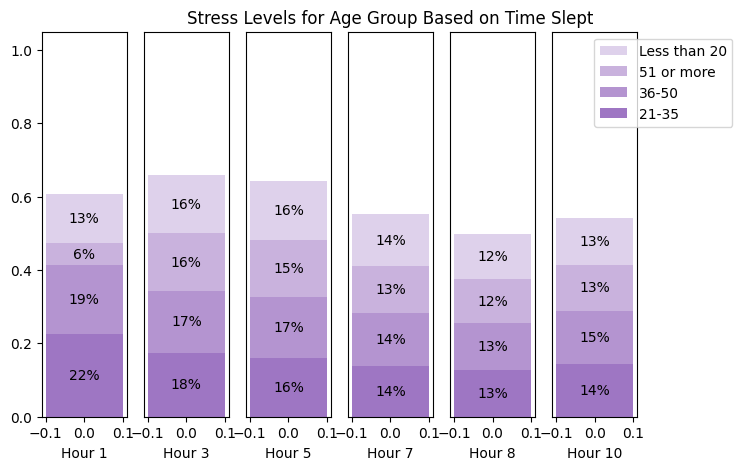

In [7]:
# The above only describes the relation between age groups
# but not how they are overall

fig, (ax1,ax3,ax5, ax7,ax8,ax10,leg) = plt.subplots(1, 7, figsize=(9, 5))

# bar chart parameters
hour1Total = 20
rat1 = 20 - 4.5-3.75-1.25-2.6666667
hour3Total =  20 
rat3 = 20 - 3.5-3.357143-3.166667-3.157895
rat5 = 20 - 3.225071-3.312121-3.088608-3.233645 
hour8Total = 20
rat8 = 20 -2.554118-2.568455-2.365023-2.479924
hour10Total = 20
rat10 = 20 - 2.854962-2.919355-2.523810-2.530612


age_ratios_1 = [4.500000/hour1Total, 3.750000/hour1Total, 1.250000/hour1Total, 2.666667/hour1Total,rat1/hour1Total]
age_ratios_3 = [3.500000/hour3Total,3.357143/hour3Total,3.166667/hour3Total,3.157895/hour3Total,rat3/hour3Total]
age_ratios_5 = [3.225071/20,3.312121/20,3.088608/20,3.233645/20,rat5/20]
age_ratios_8 = [2.554118/hour8Total,2.568455/hour8Total,2.365023/hour8Total,2.479924/hour8Total,rat8/hour8Total]
age_ratios_10 = [2.854962/hour10Total,2.919355/hour10Total,2.523810/hour10Total,2.530612/hour10Total,rat10/hour10Total]

# solely for legend
leg_ratios = [0,0,0,0,0]

totalAgeMean = 20
rat7 = 20 - 2.791724-2.838769-2.592052-2.819887
age_ratios_7 = [2.791724/totalAgeMean, 2.838769/totalAgeMean, 2.592052/totalAgeMean, 2.819887/totalAgeMean,rat7/totalAgeMean]
age_labels = ['21-35', '36-50', '51 or more', 'Less than 20','']

bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios_1, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax1.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.2 * j)
        ax1.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax1.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)
for j, (height, label) in enumerate(reversed([*zip(age_ratios_3, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax3.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.2 * j)
        ax3.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax3.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)
for j, (height, label) in enumerate(reversed([*zip(age_ratios_5, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax5.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.2 * j)
        ax5.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax5.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)

for j, (height, label) in enumerate(reversed([*zip(age_ratios_7, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax7.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.2 * j)
        ax7.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax7.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)
for j, (height, label) in enumerate(reversed([*zip(age_ratios_8, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax8.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.2 * j)
        ax8.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax8.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)
for j, (height, label) in enumerate(reversed([*zip(age_ratios_10, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax10.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.2 * j)
        ax10.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax10.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)
for j, (height, label) in enumerate(reversed([*zip(leg_ratios, age_labels)])):
    bottom -= height
    bc = leg.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.2 * j)


ax3.get_yaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)
ax7.get_yaxis().set_visible(False)
ax8.get_yaxis().set_visible(False)
ax10.get_yaxis().set_visible(False)
leg.axis('off')

ax1.set(xlabel='Hour 1')
ax3.set(xlabel='Hour 3')
ax5.set(xlabel='Hour 5')
ax7.set(xlabel='Hour 7')
ax8.set(xlabel='Hour 8')
ax10.set(xlabel='Hour 10')

ax7.set_title('Stress Levels for Age Group Based on Time Slept')
leg.legend()

plt.show()

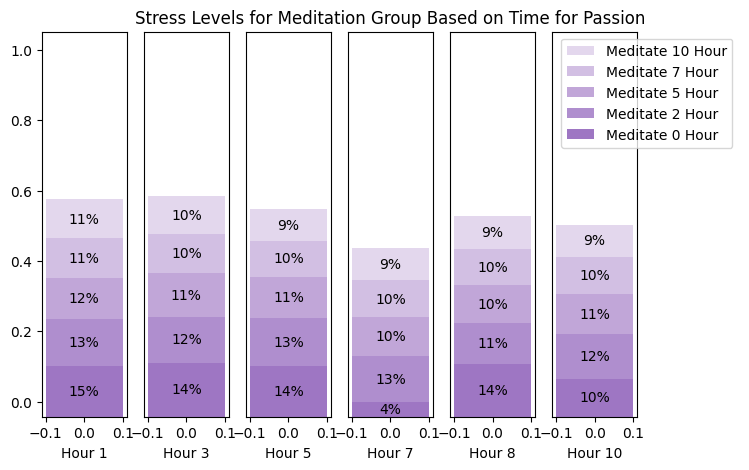

In [8]:
# Now to show the relation between time for passion, 
# weekly meditation, and stress levels

# keeping the same setup for later comparison!
fig, (ax1,ax3,ax5, ax7,ax8,ax10,leg) = plt.subplots(1, 7, figsize=(9, 5))

totalMaxStress = 25 #workin smarter and not harder this time

#i say that, then still do a manual approach...

# bar chart parameters
rat1 = totalMaxStress - 3.638-3.322-2.926-2.801-2.762
rat3 = totalMaxStress - 3.529-2.991-2.834-2.542-2.478
rat5 = totalMaxStress - 3.438-3.323-2.775-2.464-2.156
rat8 = totalMaxStress -3.625-2.744-2.619- 2.452-2.279
rat10 = totalMaxStress -2.600-3.028-2.710-2.584- 2.140


age_ratios_1 = [3.638/totalMaxStress,3.322/totalMaxStress,2.926/totalMaxStress,2.801/totalMaxStress,2.762/totalMaxStress,rat3/totalMaxStress]
age_ratios_3 = [3.529/totalMaxStress, 2.991/totalMaxStress, 2.834/totalMaxStress, 2.542/totalMaxStress,2.478/totalMaxStress,rat1/totalMaxStress]
age_ratios_5 = [ 3.438/totalMaxStress,3.323/totalMaxStress,2.775/totalMaxStress,2.464/totalMaxStress,2.156/totalMaxStress,rat5/totalMaxStress]
age_ratios_8 = [3.625/totalMaxStress,2.744/totalMaxStress,2.619/totalMaxStress, 2.452/totalMaxStress,2.279/totalMaxStress,rat8/totalMaxStress]
age_ratios_10 = [2.6/totalMaxStress,3.028/totalMaxStress,2.710/totalMaxStress,2.584/totalMaxStress, 2.140/totalMaxStress,rat10/totalMaxStress]

# solely for legend
leg_ratios = [0,0,0,0,0,0]

rat7 = totalMaxStress - 1.000-3.150-2.620-2.523-2.196

age_ratios_7 = [1.000/totalMaxStress, 3.150/totalMaxStress, 2.620/totalMaxStress, 2.523/totalMaxStress,2.196/totalMaxStress,rat7/totalMaxStress]

# not all, would be too challenging on the viewer
age_labels = ['Meditate 0 Hour', 'Meditate 2 Hour', 'Meditate 5 Hour', 'Meditate 7 Hour','Meditate 10 Hour','']

bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios_1, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax1.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.16 * j)
        ax1.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax1.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)
for j, (height, label) in enumerate(reversed([*zip(age_ratios_3, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax3.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.16 * j)
        ax3.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax3.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)
for j, (height, label) in enumerate(reversed([*zip(age_ratios_5, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax5.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.16 * j)
        ax5.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax5.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)

for j, (height, label) in enumerate(reversed([*zip(age_ratios_7, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax7.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.16 * j)
        ax7.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax7.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)
for j, (height, label) in enumerate(reversed([*zip(age_ratios_8, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax8.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.16 * j)
        ax8.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax8.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)
for j, (height, label) in enumerate(reversed([*zip(age_ratios_10, age_labels)])):
    bottom -= height
    if j != 0:
        bc = ax10.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.16 * j)
        ax10.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    else:
        bc = ax10.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0)
for j, (height, label) in enumerate(reversed([*zip(leg_ratios, age_labels)])):
    bottom -= height
    bc = leg.bar(0, height, width, bottom=bottom, color='C4', label=label,
                 alpha=0.1 + 0.16 * j)


ax3.get_yaxis().set_visible(False)
ax5.get_yaxis().set_visible(False)
ax7.get_yaxis().set_visible(False)
ax8.get_yaxis().set_visible(False)
ax10.get_yaxis().set_visible(False)
leg.axis('off')

ax1.set(xlabel='Hour 1')
ax3.set(xlabel='Hour 3')
ax5.set(xlabel='Hour 5')
ax7.set(xlabel='Hour 7')
ax8.set(xlabel='Hour 8')
ax10.set(xlabel='Hour 10')

ax7.set_title('Stress Levels for Meditation Group Based on Time for Passion')
leg.legend()

plt.show()